<a href="https://colab.research.google.com/github/Diogoa83/Diogoa83/blob/main/produto_consignado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplcyberpunk
!pip install python-bcb

In [31]:
import mplcyberpunk
import seaborn as sns
import pandas as pd
from bcb import sgs
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime
from datetime import timedelta

plt.style.use("cyberpunk")

In [32]:
import numpy as np
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [26]:
produto_consignado = pd.read_csv('/content/drive/MyDrive/Dados/Produto/produto_consignado.csv', sep=';')
produto_consignado['Data'] = pd.to_datetime(produto_consignado['Data'], format='%d/%m/%Y')

In [ ]:
produto_consignado['ValorBase'] = produto_consignado['ValorBase'].str.replace(',', '.').astype(float)
produto_consignado['Selic'] = produto_consignado['Selic'].str.replace(',', '.').astype(float)
produto_consignado['taxa_mensal_consignado'] = produto_consignado['taxa_mensal_consignado'].str.replace(',', '.').astype(float)
produto_consignado

# **CORRELAÇÃO**

In [34]:
produto_consignado.corr()

<ipython-input-34-3204314a3ace>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  produto_consignado.corr()


,ValorBase,Selic,taxa_mensal_consignado
ValorBase,1.000000,0.491876,0.431548
Selic,0.491876,1.000000,0.969828
taxa_mensal_consignado,0.431548,0.969828,1.000000


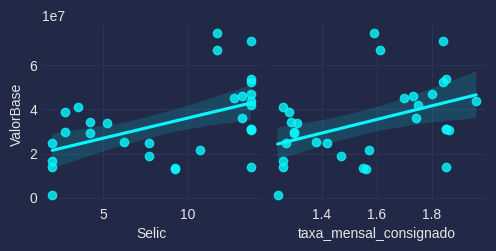

In [35]:
ax = sns.pairplot(produto_consignado, y_vars='ValorBase', x_vars=['Selic', 'taxa_mensal_consignado'], kind='reg')
ax.fig.suptitle('', fontsize=20, y=1.07)
ax

{'whiskers': [<matplotlib.lines.Line2D at 0x7f268f724fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f268f725510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f268f724d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f268f725a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f268f725cf0>],
 'means': []}

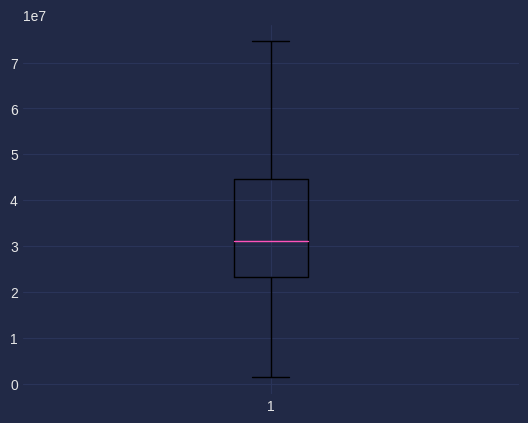

In [7]:
plt.boxplot(produto_consignado.ValorBase)

In [ ]:
plt.plot(produto_consignado.ValorBase)

In [ ]:
produto_consignado

# PREVISÕES COM ARIMA PRODUTO CONSIGNADO

In [28]:
from statsmodels.tsa.arima.model import ARIMA

#
arima = ARIMA(produto_consignado['ValorBase'], order=(3, 1, 3))
arima_fit = arima.fit()

In [29]:
# Calcular o quadrado dos resíduos médios
mse = (arima_fit.resid).mean()
print(mse)

2381203.924423803


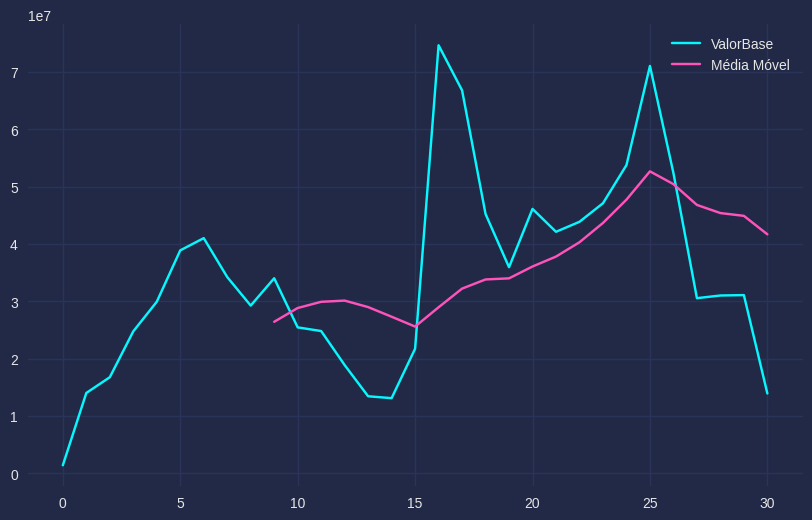

In [33]:
produto_consignado['MediaMovel'] = produto_consignado['ValorBase'].rolling(window=10).mean()

# Plotando o gráfico original e a média móvel
plt.figure(figsize=(10, 6))
plt.plot(produto_consignado['ValorBase'], label='ValorBase')
plt.plot(produto_consignado['MediaMovel'], label='Média Móvel')
plt.legend()

# Exibindo o gráfico
plt.show()


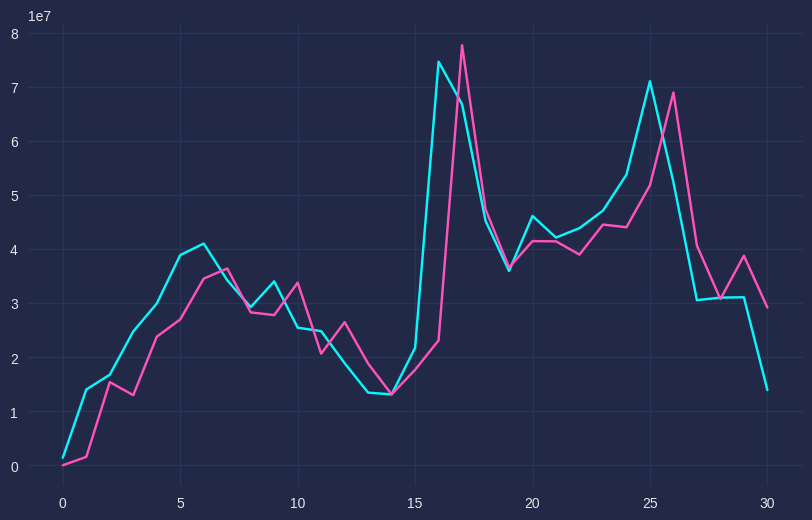

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(produto_consignado.ValorBase)
plt.plot(arima_fit.predict(typ='levels'))

In [35]:
#final da serie historica
produto_consignado.ValorBase.tail(6).round()

25    71015802.0
26    52344116.0
27    30532544.0
28    31000049.0
29    31067617.0
30    13917780.0
Name: ValorBase, dtype: float64

In [ ]:
# RESULTADO ARIMA PARA OS PROXIMOS 6 MESES
previsão = (arima_fit.forecast(steps=6).round())
arima_fit.forecast(steps=6).round()

31    15535733.0
32    25071352.0
33    27906051.0
34    28084251.0
35    30657277.0
36    31127166.0
Name: predicted_mean, dtype: float64

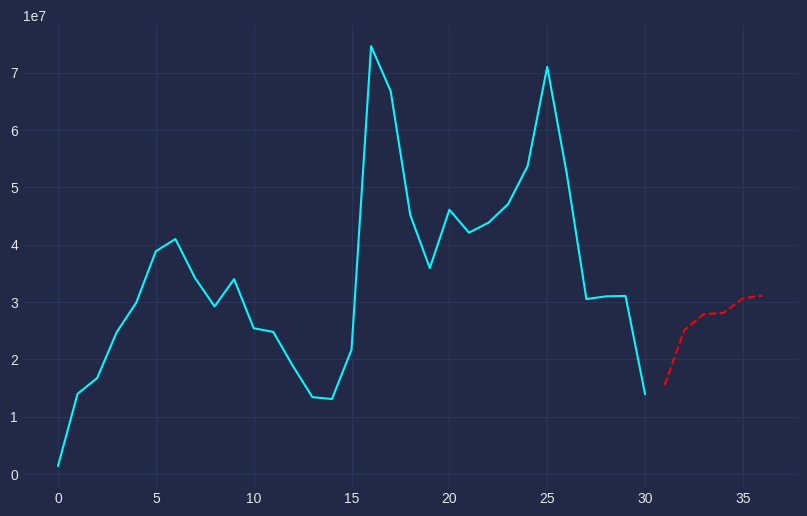

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(produto_consignado.ValorBase)
plt.plot(previsão, color='red', linestyle='--', label='Previsão')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2fe0086b00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2fe01455d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2fe0086620>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2fe0146b30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2fe01450f0>],
 'means': []}

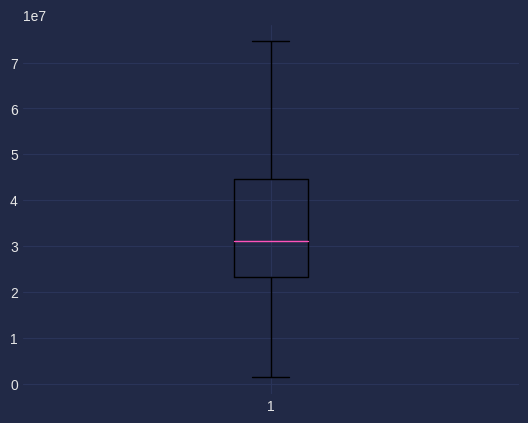

In [ ]:
plt.boxplot(produto_consignado.ValorBase)

# MODELO ECONOMETRICO

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
produto_consignado.info()

In [28]:
modelo2 = smf.ols(data = produto_consignado, formula = 'ValorBase ~ Selic + taxa_mensal_consignado' )
modelo_ajustado = modelo2.fit()
print(modelo_ajustado.summary() )

                            OLS Regression Results                            
Dep. Variable:              ValorBase   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     5.357
Date:                Fri, 23 Jun 2023   Prob (F-statistic):             0.0107
Time:                        19:13:37   Log-Likelihood:                -555.51
No. Observations:                  31   AIC:                             1117.
Df Residuals:                      28   BIC:                             1121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               7.87

# PREVISÕES COM PYCARET CONVENIO FEDERAL
Aplicando modelos com variáveis exógenas

In [ ]:
!pip install pycaret

In [8]:
from pycaret.time_series import *

In [12]:
setup(produto_consignado, target='ValorBase', fh=3, fold=3)

,Description,Value
0,session_id,3641
1,Target,ValorBase
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(31, 4)"
5,Transformed data shape,"(31, 4)"
6,Transformed train set shape,"(28, 4)"
7,Transformed test set shape,"(3, 4)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [13]:
plot_model(plot='diagnostics')

In [14]:
melhor_modelo = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,0.9317,0.7209,8165273.4100,9920809.5086,0.1936,0.1742,-1.0228,2.5500
croston,Croston,1.6457,1.1571,14606913.1607,16075921.0653,0.2931,0.3436,-6.6640,0.0333
grand_means,Grand Means Forecaster,1.8026,1.2919,16005941.8437,17928892.3728,0.3137,0.3831,-8.4245,0.0400


Processing:   0%|          | 0/93 [00:00<?, ?it/s]

In [15]:
#checandoo estatistica
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,31.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,34412128.429355
3,Summary,Statistics,Transformed,Median,,31067616.59
4,Summary,Statistics,Transformed,Standard Deviation,,17522927.3745
5,Summary,Statistics,Transformed,Variance,,307052983772001.875
6,Summary,Statistics,Transformed,Kurtosis,,0.114279
7,Summary,Statistics,Transformed,Skewness,,0.538275
8,Summary,Statistics,Transformed,# Distinct Values,,31.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",37.219695


In [16]:
modelo_naive = create_model('naive')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,18.0000,0.4738,0.3814,4420508.6933,5667134.3630,0.1170,0.1064,-0.8370
1,21.0000,0.6713,0.5227,6117507.8133,7373014.1734,0.1206,0.1316,-2.2095
2,24.0000,1.6502,1.2586,13957803.7233,16722279.9895,0.3433,0.2846,-0.0217
Mean,nan,0.9317,0.7209,8165273.4100,9920809.5086,0.1936,0.1742,-1.0228
SD,nan,0.5144,0.3846,4154114.9941,4859527.2067,0.1058,0.0788,0.9028


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
# Decomposição da Serie Historica
plot_model(modelo_naive, plot = 'decomp_stl')

Decomposition is currently not supported for pandas dataframes without a PeriodIndex or DatetimeIndex. Please specify a PeriodIndex or DatetimeIndex in setup() before plotting decomposition plots.


In [18]:
plot_model(modelo_naive, plot='train_test_split')

In [19]:
final = finalize_model(modelo_naive)
final

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                NaiveForecaster())]))])

In [ ]:
# Supondo que você tem um DataFrame chamado 'df_exogenas' contendo as variáveis exógenas
exogenas = produto_consignado[['Selic', 'taxa_mensal_consignado']]

# Fazendo previsões com as variáveis exógenas
previsoes = predict_model(final, data=exogenas)

# Plotando as previsões
plot_model(previsoes, plot='forecast')

In [ ]:
# algoritmo reconhece um impacto exogeno sobre a base de dados, identificar esta variavel a acrecentar no modelo

plot_model(final, plot='forecast')

In [ ]:
# Fazer previsões usando o modelo treinado e as variáveis exógenas
predictions = predict_model(final, data=exogenous_data)